# Dependencies

In [1]:
!pip install kaggle



In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [1]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 88% 143M/163M [00:00<00:00, 242MB/s]
100% 163M/163M [00:00<00:00, 231MB/s]


In [2]:
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('done')


done


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [89]:
import os
import numpy as np
import matplotlib.pyplot as plt
import  matplotlib.image as mpimg
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow

In [90]:
import tensorflow as tf
from tensorflow import keras

In [91]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_717.jpg', 'with_mask_3213.jpg', 'with_mask_1930.jpg', 'with_mask_1814.jpg', 'with_mask_3354.jpg']
['with_mask_2990.jpg', 'with_mask_2468.jpg', 'with_mask_3715.jpg', 'with_mask_72.jpg', 'with_mask_606.jpg']


In [92]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2028.jpg', 'without_mask_456.jpg', 'without_mask_233.jpg', 'without_mask_1938.jpg', 'without_mask_3325.jpg']
['without_mask_1792.jpg', 'without_mask_1371.jpg', 'without_mask_773.jpg', 'without_mask_3067.jpg', 'without_mask_1695.jpg']


In [93]:
len(with_mask_files)

3725

In [94]:
len(without_mask_files)

3828

In [95]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [96]:
labels=with_mask_labels+without_mask_labels

In [97]:
img=cv2.imread('/content/data/without_mask/without_mask_1009.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

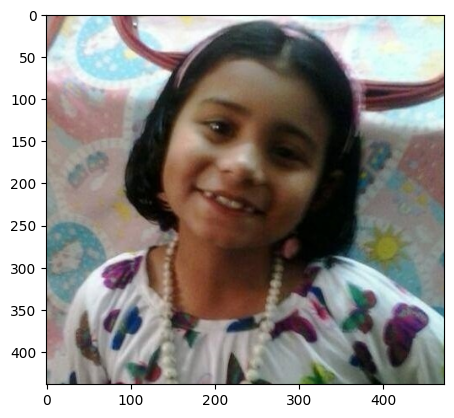

In [98]:
imgplot=plt.imshow(img)

In [99]:
#   IMAGE PROCESSING

In [100]:
# resize
# convert to nunmpy arrays

In [101]:
# convert images to numpy array
with_mask=os.listdir('/content/data/with_mask')
without_mask=os.listdir('/content/data/without_mask')

In [102]:
with_mask

['with_mask_717.jpg',
 'with_mask_3213.jpg',
 'with_mask_1930.jpg',
 'with_mask_1814.jpg',
 'with_mask_3354.jpg',
 'with_mask_3343.jpg',
 'with_mask_1368.jpg',
 'with_mask_1020.jpg',
 'with_mask_742.jpg',
 'with_mask_107.jpg',
 'with_mask_3628.jpg',
 'with_mask_2461.jpg',
 'with_mask_67.jpg',
 'with_mask_533.jpg',
 'with_mask_509.jpg',
 'with_mask_402.jpg',
 'with_mask_2662.jpg',
 'with_mask_3640.jpg',
 'with_mask_1196.jpg',
 'with_mask_1378.jpg',
 'with_mask_264.jpg',
 'with_mask_3012.jpg',
 'with_mask_1468.jpg',
 'with_mask_1870.jpg',
 'with_mask_2850.jpg',
 'with_mask_3155.jpg',
 'with_mask_176.jpg',
 'with_mask_2451.jpg',
 'with_mask_1543.jpg',
 'with_mask_2695.jpg',
 'with_mask_618.jpg',
 'with_mask_2730.jpg',
 'with_mask_3001.jpg',
 'with_mask_731.jpg',
 'with_mask_1926.jpg',
 'with_mask_3587.jpg',
 'with_mask_168.jpg',
 'with_mask_3477.jpg',
 'with_mask_3235.jpg',
 'with_mask_2498.jpg',
 'with_mask_2500.jpg',
 'with_mask_59.jpg',
 'with_mask_1133.jpg',
 'with_mask_1386.jpg',
 'w

In [103]:
with_mask_path='/content/data/with_mask/'
without_mask_path='/content/data/without_mask/'

data=[]

for img_file in with_mask_files:
  image=cv2.imread(with_mask_path+img_file)
  image=cv2.resize(image,(224,224))
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  data.append(image)

In [104]:
for img_file in without_mask_files:
  image=cv2.imread(without_mask_path+img_file)
  image=cv2.resize(image,(224,224))
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  data.append(image)

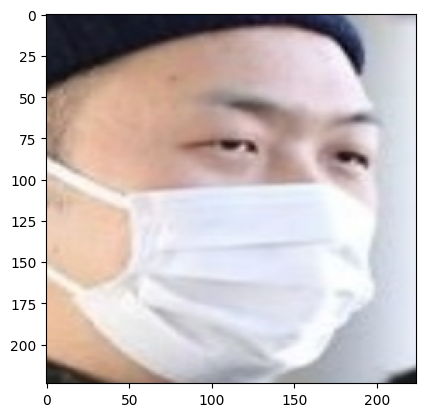

In [105]:
plt.imshow(data[0])

In [106]:
X=np.array(data)
y=np.array(labels)

In [107]:
type(X)
type(y)

numpy.ndarray

In [108]:
X.shape

(7553, 224, 224, 3)

In [109]:
y.shape

(7553,)

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [112]:
X_train=X_train/255.0

In [113]:
X_test=X_test/255.0

Building CNN model

In [114]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [115]:
def create_vgg16_model(input_shape=(224, 224, 3), learning_rate=0.0001):

    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

model = create_vgg16_model()

In [116]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [118]:
history = model.fit(X_train, y_train, batch_size=32,epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
201/201 [==============================] - 139s 689ms/step - loss: 0.5411 - accuracy: 0.8069 - val_loss: 0.4426 - val_accuracy: 0.8544
Epoch 2/10
201/201 [==============================] - 139s 690ms/step - loss: 0.3815 - accuracy: 0.8798 - val_loss: 0.3245 - val_accuracy: 0.8985
Epoch 3/10
201/201 [==============================] - 139s 690ms/step - loss: 0.2971 - accuracy: 0.9058 - val_loss: 0.2657 - val_accuracy: 0.9117
Epoch 4/10
201/201 [==============================] - 140s 697ms/step - loss: 0.2503 - accuracy: 0.9202 - val_loss: 0.2349 - val_accuracy: 0.9250
Epoch 5/10
201/201 [==============================] - 141s 703ms/step - loss: 0.2193 - accuracy: 0.9276 - val_loss: 0.2054 - val_accuracy: 0.9276
Epoch 6/10
201/201 [==============================] - 139s 691ms/step - loss: 0.1971 - accuracy: 0.9355 - val_loss: 0.1868 - val_accuracy: 0.9391
Epoch 7/10
201/201 [==============================] - 139s 693ms/step - loss: 0.1791 - accuracy: 0.9397 - val_loss: 0.1746 -

In [119]:

def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

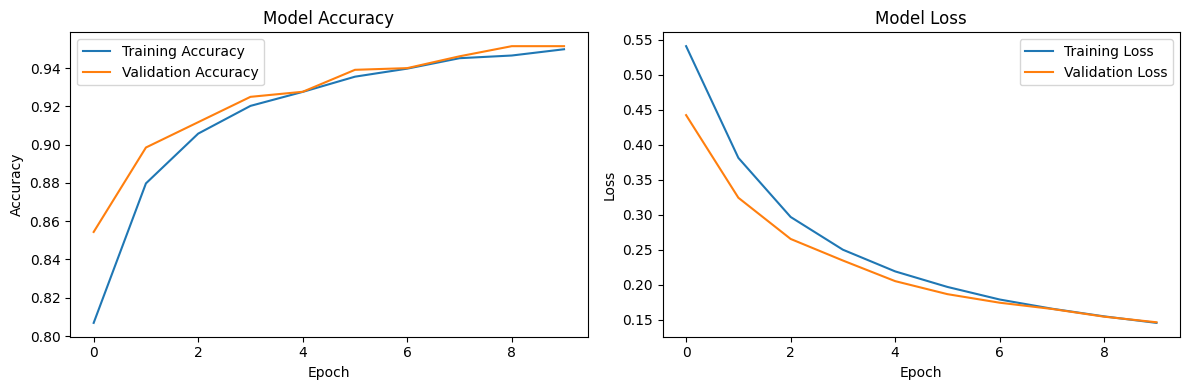

In [120]:
plot_training_history(history)

In [121]:
model.save('model_final_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [123]:
img=cv2.imread('/content/images (7).jpeg')
img=cv2.resize(img,(224,224))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = np.expand_dims(img, axis=0)

model.predict(img)

1/1 [==============================] - 0s 74ms/step


array([[1.]], dtype=float32)

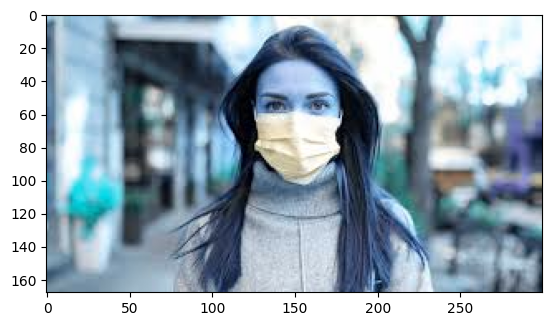

In [129]:
img=cv2.imread('/content/images (7).jpeg')
plt.imshow(img)

In [130]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

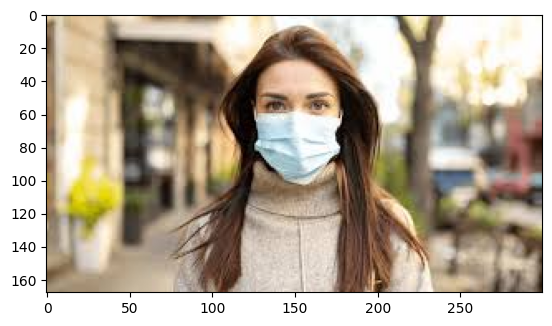

In [131]:
plt.imshow(img)

In [132]:
img= cv2.resize(img,(224,224))

In [133]:
# Add a batch dimension to the image.
img = np.expand_dims(img, axis=0)

# Now you can predict using the model.
model.predict(img)

1/1 [==============================] - 0s 74ms/step


array([[1.]], dtype=float32)